In [1]:
"""

 This is a "CGLMP Analysis" program in Python

 Author:  Yuan-Yen Gary Peng 
 Email:   ypeng@cern.ch
 Version: 3.0
 Copyrghit: Yuan-Yen Peng
 Liscence: MIT License

"""

'\n\n This is a "CGLMP Analysis" program in Python\n\n Author:  Yuan-Yen Gary Peng \n Email:   ypeng@cern.ch\n Version: 3.0\n Copyrghit: Yuan-Yen Peng\n Liscence: MIT License\n\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
LB = np.array([0, 20, 30, 40, 50]) * 1e3 # [GeV]
path = '/Users/gary/Desktop/log.txt' # path to log file
binwidth = 0.5 # number of bins
xlim = [-35, 35] # xlimit for each histogram

In [4]:
def hist(data, binwidth, xlim):
  '''
  Plot the histogram.
  :param data: read from the log.txt
  :param binwidth: set the width of bins 
  :param xlim: rset the width of histogram
  '''
  plt.hist(data, 
          bins = np.arange(min(data), max(data) + binwidth, binwidth), 
          density = False,
          stacked = False,
          histtype = 'stepfilled', # 'bar', 'step'...
          facecolor = 'g', 
          edgecolor = 'g', 
          alpha = 0.3)
  plt.xlim(xlim)
  plt.xlabel("Values")
  plt.ylabel("Frequency")
  plt.title(f"CGLMP distribution \n with histigram binswidth = {binwidth}")
  plt.show()
  
def info(data):
  '''
  Print the information about CGLMP.
  :param data: read from the log.txt
  '''
  num = len(data)
  sum = np.sum(data)
  avg = np.average(data)
  mode = stats.mode(data, keepdims = True)
  var = np.var(data)
  
  SKEW, KUR = 0., 0.
  skew = stats.skew(data)
  if skew > 0.:
    SKEW = 'positive skew'
  elif skew < 0.:
    SKEW = 'negative skew'
  else:
    SKEW = 'none'
  kurtosis = stats.kurtosis(data)
  if kurtosis > 0.:
    KUR = 'leptokurtic'
  elif kurtosis < 0.:
    KUR = 'platykurtic'
  else:
    KUR = 'none'

  return [num, sum, avg, mode, var, skew, kurtosis, SKEW, KUR]

def CGLMP(data, binwidth, xlim):
  '''
  Plot the desired information from the input files.
  :param data: read from the log.txt
  :param binwidth: set the width of bins
  :param xlim: rset the width of histogram
  '''
  hist(data, binwidth, xlim)
  print(f"The number of event is {int(info(data)[0])}")
  # print(f"The sum is {float(info(data)[1])}")
  print(f"The average is {float(info(data)[2])}")
  # print(f"The mode is {info(data)[3][0]}")
  print(f"The variance is {float(info(data)[4])}")
  print(f"The skewness is {float(info(data)[5])} --> {str(info(data)[7])}")
  print(f"The kurtosis is {float(info(data)[6])} --> {str(info(data)[8])}")
  print('\n')
  
  return

In [5]:
xy = np.zeros(0) # initialize xy
yz = np.zeros(0) # initialize yz
zx = np.zeros(0) # initialize zx
Mp = np.zeros(0) # initialize Mp
Mm = np.zeros(0) # initialize Mm

# read data from .txt file
# read lines of data with specified names
with open(path) as f:
    for line in f.readlines():
      s_xy = line.rstrip('\n').split(' ')
      s_yz = line.rstrip('\n').split(' ')
      s_zx = line.rstrip('\n').split(' ')
      s_M   = line.rstrip('\n').split(' ')

      for i in range (0, np.size(s_M)):
        if s_M[i] == '#Python':
          Mp = np.append(Mp, float(s_M[i + 5]))
          Mm = np.append(Mm, float(s_M[i + 6]))

      for i in range(0, np.size(s_xy)):
        if s_xy[i] == '(xy):':
          xy = np.append(xy, float(s_xy[i + 1]))
        if s_yz[i] == '(yz):':
          yz = np.append(yz, float(s_yz[i + 1]))
        if s_zx[i] == '(zx):':
          zx = np.append(zx, float(s_zx[i + 1]))

In [6]:
def Data(LB):
  '''
  Apply the cut of the lower bound of W boson.
  :param LB: is the cut of pwer bound.
  '''
  ind = np.zeros(0, dtype = 'int') # creat a integer empty array.
  XY = np.zeros(0) # type of float64, in general.
  YZ = np.zeros(0)
  ZX = np.zeros(0)

  for i in range (0, np.size(Mp)): # or np.size(Mm)
    if (Mp[i] > LB and
        Mm[i] > LB):
      ind = np.append(ind, i)
      
  for j in ind:
    XY = np.append(XY, xy[j])
    YZ = np.append(YZ, yz[j])
    ZX = np.append(ZX, zx[j])
  
  DATA = [XY, YZ, ZX]
  
  return DATA

For lower bound: 0.0 [GeV] 

xy: 


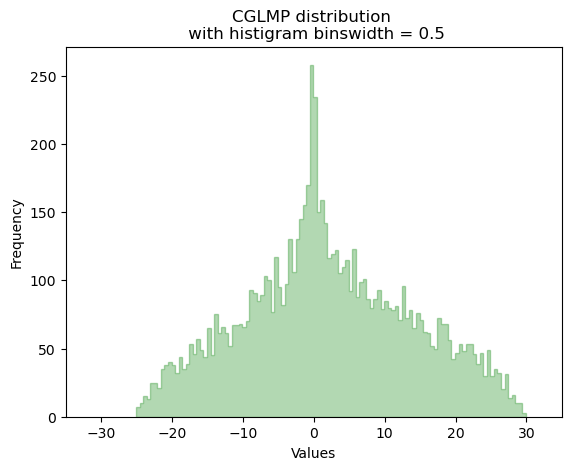

The number of event is 7901
The average is 1.952231897159524
The variance is 140.94653616078037
The skewness is 0.0864839533999026 --> positive skew
The kurtosis is -0.560214784485741 --> platykurtic


yz: 


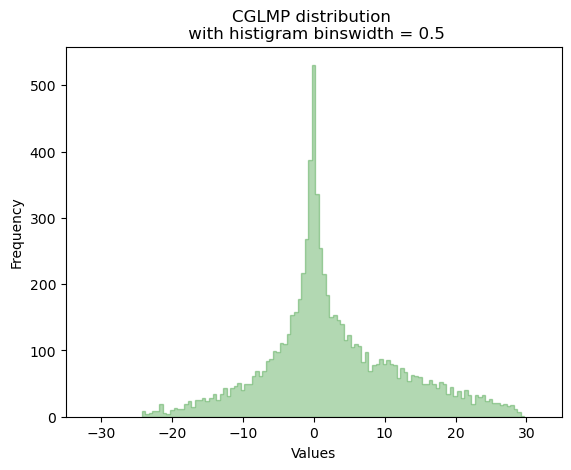

The number of event is 7901
The average is 2.5070552730030378
The variance is 89.99163626073508
The skewness is 0.33820583220712735 --> positive skew
The kurtosis is 0.3089530655201367 --> leptokurtic


zx: 


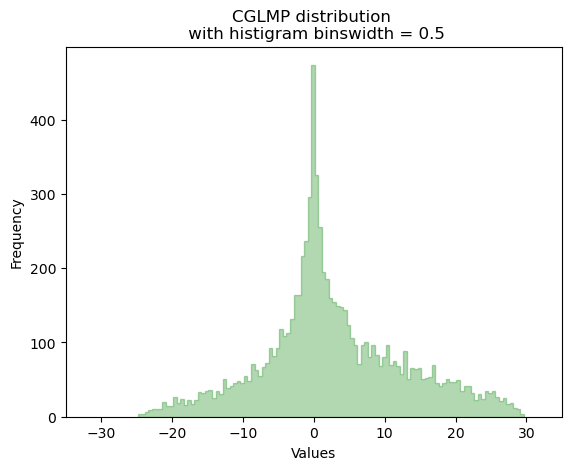

The number of event is 7901
The average is 2.614429805107455
The variance is 101.20644110272303
The skewness is 0.2449890253915963 --> positive skew
The kurtosis is 0.11898037174824383 --> leptokurtic




In [7]:
# Retrieving data depending on the specific lower bound.
# LB = 0 [GeV]
DATA = Data(LB[0])
print(f'For lower bound: {LB[0]/1e3} [GeV] \n')
# for xy
print('xy: ')
CGLMP(DATA[0], binwidth, xlim)
# for yz      
print('yz: ') 
CGLMP(DATA[1], binwidth, xlim)
# for zx
print('zx: ')
CGLMP(DATA[2], binwidth, xlim)

For lower bound: 20.0 [GeV] 

xy: 


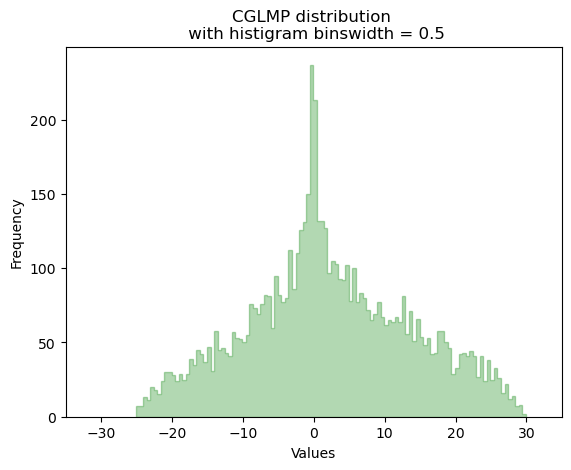

The number of event is 6520
The average is 2.1175310750824234
The variance is 135.10976321304074
The skewness is 0.09007340841903304 --> positive skew
The kurtosis is -0.47570085693407993 --> platykurtic


yz: 


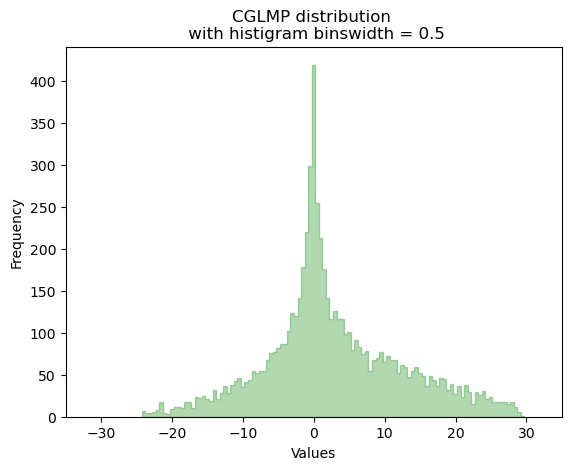

The number of event is 6520
The average is 2.701899204593098
The variance is 94.68598029586865
The skewness is 0.3077619221159197 --> positive skew
The kurtosis is 0.17278223460660191 --> leptokurtic


zx: 


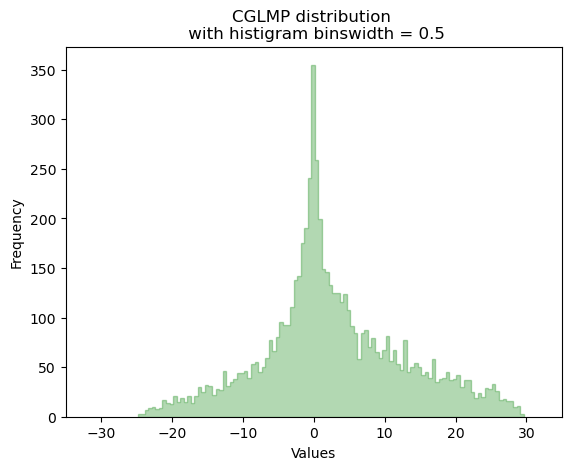

The number of event is 6520
The average is 2.640289690581288
The variance is 104.34701598626187
The skewness is 0.22877611643116916 --> positive skew
The kurtosis is 0.06445405603267007 --> leptokurtic




In [8]:
# Retrieving data depending on the specific lower bound.
# LB = 20 [GeV]
DATA = Data(LB[1])
print(f'For lower bound: {LB[1]/1e3} [GeV] \n')
# for xy
print('xy: ')
CGLMP(DATA[0], binwidth, xlim)
# for yz      
print('yz: ') 
CGLMP(DATA[1], binwidth, xlim)
# for zx
print('zx: ')
CGLMP(DATA[2], binwidth, xlim)

For lower bound: 30.0 [GeV] 

xy: 


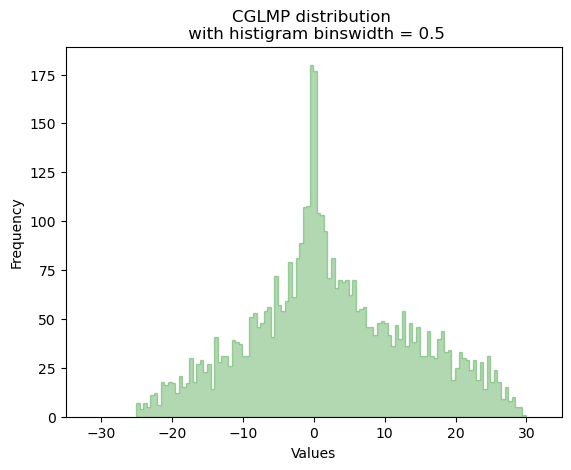

The number of event is 4564
The average is 2.316614845849562
The variance is 128.41108826902973
The skewness is 0.11724929195725518 --> positive skew
The kurtosis is -0.38410745865467044 --> platykurtic


yz: 


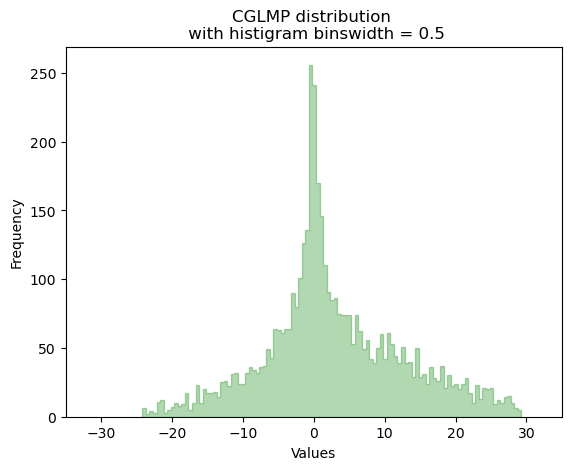

The number of event is 4564
The average is 2.757440610135188
The variance is 97.7709179871973
The skewness is 0.2630992698661697 --> positive skew
The kurtosis is 0.12490239399736591 --> leptokurtic


zx: 


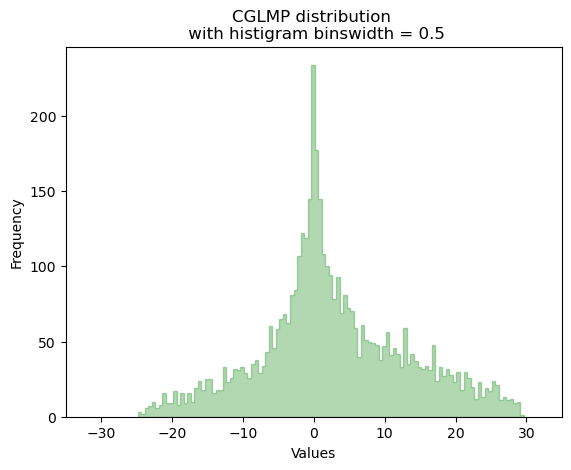

The number of event is 4564
The average is 2.6752386260823835
The variance is 109.63267301119217
The skewness is 0.18531336974108917 --> positive skew
The kurtosis is -0.033518716701507856 --> platykurtic




In [9]:
# Retrieving data depending on the specific lower bound.
# LB = 30 [GeV]
DATA = Data(LB[2])
print(f'For lower bound: {LB[2]/1e3} [GeV] \n')
# for xy
print('xy: ')
CGLMP(DATA[0], binwidth, xlim)
# for yz      
print('yz: ') 
CGLMP(DATA[1], binwidth, xlim)
# for zx
print('zx: ')
CGLMP(DATA[2], binwidth, xlim)

For lower bound: 40.0 [GeV] 

xy: 


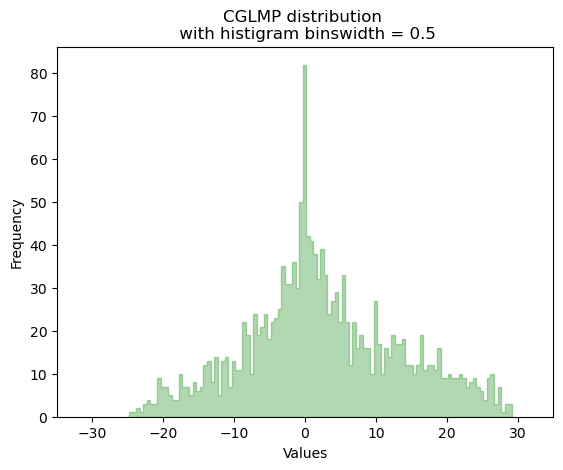

The number of event is 1664
The average is 2.521322913954327
The variance is 119.54900817373868
The skewness is 0.15833633018464738 --> positive skew
The kurtosis is -0.2669451263563447 --> platykurtic


yz: 


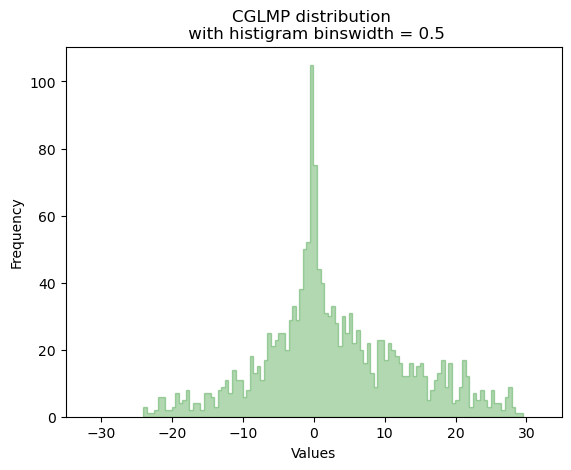

The number of event is 1664
The average is 2.6885514719591344
The variance is 103.22069637911119
The skewness is 0.21894864284430832 --> positive skew
The kurtosis is 0.029016213053624895 --> leptokurtic


zx: 


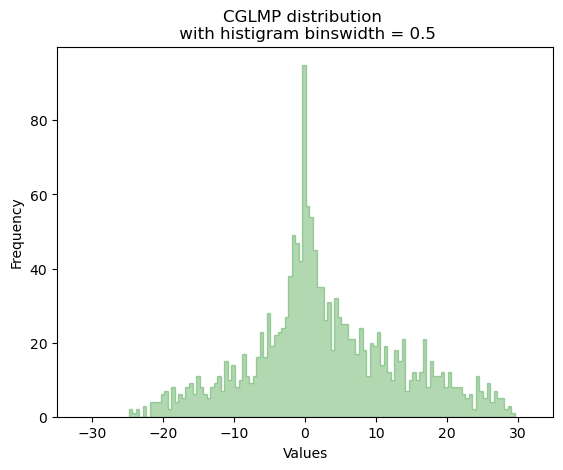

The number of event is 1664
The average is 2.6913245787439903
The variance is 110.17705665093187
The skewness is 0.17830064538158752 --> positive skew
The kurtosis is -0.05923886090220343 --> platykurtic




In [10]:
# Retrieving data depending on the specific lower bound.
# LB = 40 [GeV]
DATA = Data(LB[3])
print(f'For lower bound: {LB[3]/1e3} [GeV] \n')
# for xy
print('xy: ')
CGLMP(DATA[0], binwidth, xlim)
# for yz      
print('yz: ') 
CGLMP(DATA[1], binwidth, xlim)
# for zx
print('zx: ')
CGLMP(DATA[2], binwidth, xlim)

For lower bound: 50.0 [GeV] 

xy: 


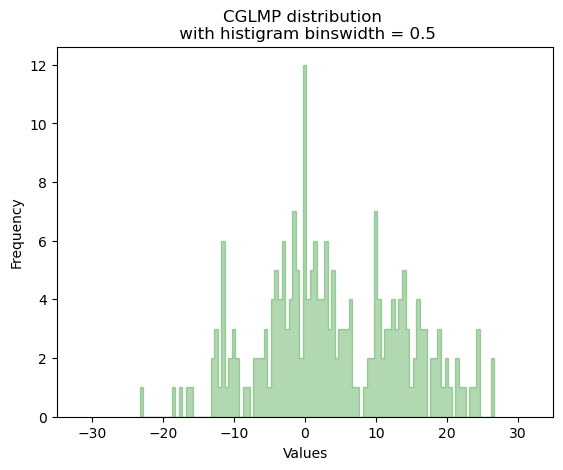

The number of event is 221
The average is 3.8940970737556566
The variance is 100.90152257131032
The skewness is 0.07808537551508325 --> positive skew
The kurtosis is -0.5087777095773101 --> platykurtic


yz: 


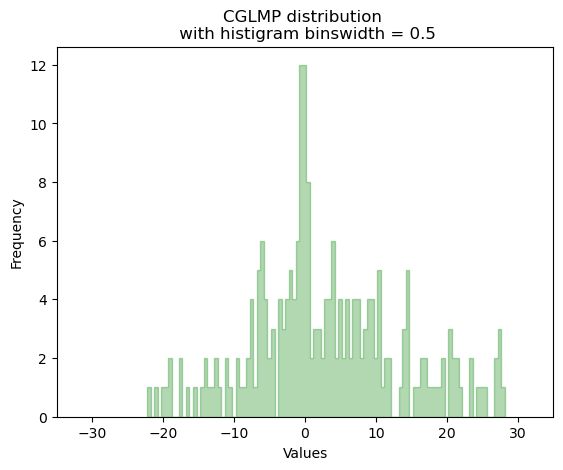

The number of event is 221
The average is 2.8972355852488687
The variance is 113.16159529329649
The skewness is 0.244908105927296 --> positive skew
The kurtosis is -0.10623740710547569 --> platykurtic


zx: 


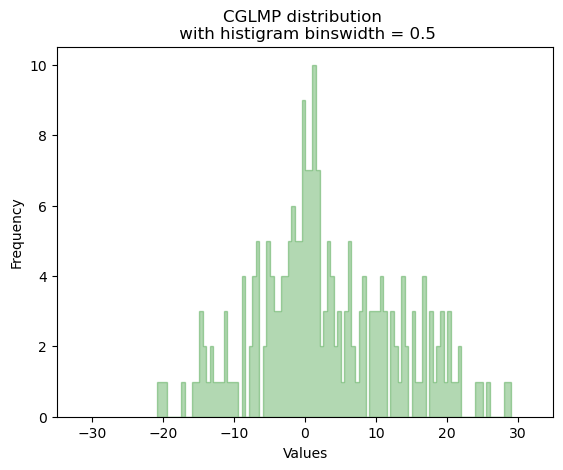

The number of event is 221
The average is 2.7100467764705884
The variance is 99.82247637242705
The skewness is 0.2356037904059876 --> positive skew
The kurtosis is -0.24220911489762464 --> platykurtic




In [11]:
# Retrieving data depending on the specific lower bound.
# LB = 50 [GeV]
DATA = Data(LB[4])
print(f'For lower bound: {LB[4]/1e3} [GeV] \n')
# for xy
print('xy: ')
CGLMP(DATA[0], binwidth, xlim)
# for yz      
print('yz: ') 
CGLMP(DATA[1], binwidth, xlim)
# for zx
print('zx: ')
CGLMP(DATA[2], binwidth, xlim)